## Deutsch Algorithm with a single qubit

We would like to simulate Deutsch algorithm with a single qubit.

**Assignment 1.a:** Write a function which returns a Deutsch algorithm circuit involing one of the four possible oracle transformations ($I,-I,\sigma_z,-\sigma_z$) randomly. Do not forget to measure the qubit at the end.

Hint: You can obtain $-I$ with a combination of $\sigma_x$'s and $\sigma_z$'s. Or, you are free to find some other way.

In [2]:
def randomDeutschCircuit():
  
  qc  = QuantumCircuit(1,1) # We involve an additional classical bit for readout purposes.
  rnd = randint(4)          # 0,1 and 2,3 correspond to constant and balanced functions, respectively.
  
  
  # Your code goes here - do not alter any code above or below this line
  
  #******** My solution ********#
  qc.h(0)
  qc.barrier()
  if rnd == 1:
    qc.z(0)
    qc.x(0)
    qc.z(0)
    qc.x(0)
  if rnd == 2:
    qc.z(0)
  if rnd == 3:
    qc.x(0)
    qc.z(0)
    qc.x(0)
  qc.barrier()
  qc.h(0)
  qc.measure(0,0)
  #****************************#
  
  return qc, rnd

**Assignment 1.b:** Run the circuit 1000 times and print the counts. You can run the below code repetitively to see whether your results makes sense. Are your readout results correctly predict the type of the oracle?

{'0': 1000}
Oracle is constant.


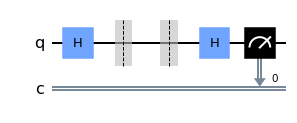

In [3]:
rndCirc, rndNum = randomDeutschCircuit()

# Your code goes here - do not alter any code above or below this line

#******** My solution ********#
job = execute(rndCirc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(rndCirc)
print(counts)
#****************************#

if rndNum == 0 or rndNum == 1:
  print("Oracle is constant.")
else:
  print("Oracle is balanced.")  
rndCirc.draw(output='mpl')
 

## Simulation of Deutsch algorithm

We would like to implement the Deutsch algorithm involving a main qubit <code>q[0]</code> and ancilla <code>q[1]</code>.

**Assignment 2a:** Below the function F1 is given. It represents the first quantum oracle $F_1=X$.  Define the other oracle functions $F_2$ and $F_3$ similarly.

*Note 1:* These functions will be called and employed by other pieces of code later on.

*Note 2*: We do not need to define $F_0=I$.


In [4]:
def F1(qc):  # Function F1 takes qc as an argument, where qc is a quantum circuit
  qc.x(1)    # Function F1 adds an X gate to the given quantum circuit qc.  
             # Note that we do not need to call any "return" function. The argument qc will be modified by F1 function
    
    
# Your code goes here. Do not change anything above this line.
  
def F2(qc):
  qc.x(0)
  qc.cx(0,1)
  qc.x(0)

def F3(qc):
  qc.cx(0,1)

 **Assignment 2b:** Write a <code>blackBox(qc)</code>function which adds one of the four possible quantum oracles ($F_0$, $F_1$, $F_2$, $F_3$) to a quantum circuit <code>qc</code>, randomly. You will employ the functions defined in Assignment 2a. 
 
*Note:* To call a function, you can simply use, <code>function_name(argument)</code>. For example, to call <code>F1</code> function with argument <code>qc</code>, we simply use <code>F1(qc)</code>.

In [5]:
def blackBox(qc):  # Function blackbox(qc) takes qc as an argument, where qc is a quantum circuit
  
  rnd = randint(4) # 0,1 and 2,3 correspond to constant and balanced functions, respectively.

  qc.barrier()
  
  # Your code goes here. Do not change any code above or below this line.
  if rnd == 1: F1(qc)
  if rnd == 2: F2(qc)
  if rnd == 3: F3(qc)
  qc.barrier()


**Assignment 2c:** By using the <code>blackbox(qc)</code> function defined in Assignment 2b, construct a full Deutsch algorithm circuit involving the appropriate measurement. Do not run (simulate) or draw your circuit yet.

*Note:* You may run this code many times to obtain a Deutsch circuit with a random oracle each time.

In [22]:
# Your code goes here.

qc  = QuantumCircuit(2,1) 
qc.x(1)
qc.h(0)
qc.h(1)
blackBox(qc)
qc.h(0)
qc.measure(0,0)

**Assignment 2d:** Run your circuit for 1000 shots, print the measurement results and draw the circuit.  

{'1': 1000}


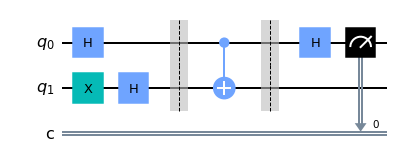

In [23]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)
qc.draw(output='mpl')

**Assignment 2e:** Run the codes you wrote in Assignments 2c and 2d many times to verify that your measurement results and circuit diagrams are compatible. You don't need to write something for this assignment.

## Realization of phase kickback

Here, we would like to verify an observable effect of phase kickback.

**Assignment 1a:** Construct the following circuit and simulate it for 1000 shots. Print your measurement statistics.

<img src="QPRG-class09-fig1.png">

{'1': 1000}


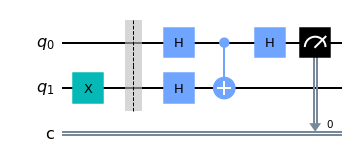

In [24]:
#Your code goes here

qc  = QuantumCircuit(2,1) 
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)
qc.draw(output='mpl')

**Assignment 1b:** Remove the CX gate and repeat Assignment 1a. What has changed in your measurement results? Explain how CX gate affects <code>q[0]</code>.

{'0': 1000}


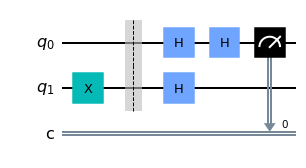

In [25]:
#Your code goes here

qc  = QuantumCircuit(2,1) 
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
#qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)
qc.draw(output='mpl')